In [6]:
import pandas as pd
import geopandas as gp
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("field_data.csv")

In [23]:
# number of fields in each neighborhood
data['neighborhood'].value_counts()

Brighton Heights            7
Brookline                   6
South Side Slopes           6
Squirrel Hill South         5
Carrick                     5
Highland Park               4
Mount Washington            4
Hazelwood                   4
Lower Lawrenceville         4
Shadyside                   3
Morningside                 3
Beechview                   3
Beltzhoover                 3
Troy Hill                   3
Sheraden                    3
Lincoln-Lemington-Belmar    2
Greenfield                  2
Central Lawrenceville       2
South Oakland               2
South Side Flats            2
Banksville                  2
Bedford Dwellings           2
Elliott                     2
Westwood                    2
Manchester                  2
Crafton Heights             2
Regent Square               2
Perry North                 2
Spring Hill-City View       2
Allegheny Center            2
Polish Hill                 1
Spring Garden               1
Upper Lawrenceville         1
Garfield  

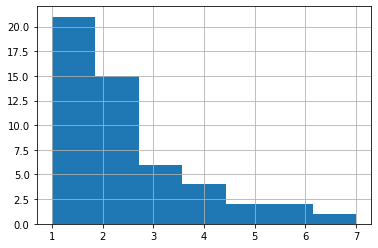

In [18]:
#Fields per neighborhood
fields_per_hood = data['neighborhood'].value_counts()
#A histogram of fields per neighborhood
fields_per_hood.hist(bins=7)

In [31]:
# adding a field count column and check it
data['field_count'] = 1
data.head()

id               name has_lights                    park  \
0  1914615260  Arlington Field 1          t          Arlington Park   
1  1151740179          Armstrong          f          Armstrong Park   
2   971009139            Bandbox          f            Arsenal Park   
3  1581124728         Banksville          f         Banksville Park   
4  1052125703  Banksville School          t  Banksville School Park   

               field_usage  goal_post infield_type  left_field_distance  \
0             Diamond Only          0      Skinned                160.0   
1  Diamond and Rectangular          0      Skinned                240.0   
2             Diamond Only          0      Skinned                135.0   
3             Diamond Only          0      Skinned                304.0   
4             Diamond Only          0      Skinned                180.0   

   center_field_distance  right_field_distance  ...  ward        tract  \
0                  230.0                 290.0  ...    16  42003160800   
1                  163.0                 122.0  ...    17  42003170200   
2                  200.0                 150.0  ...     6  42003060300   
3                  354.0                 373.0  ...    20  42003202300   
4                  175.0                 185.0  ...    20  42003202300   

   public_works_division  pli_division  police_zone  fire_zone   latitude  \
0                      3            16            3       4-22  40.418314   
1                      3            17            3       4-24  40.428074   
2                      2             6            2        3-3  40.466331   
3                      5            20            6        4-9  40.413923   
4                      5            20            6        4-9  40.407059   

   longitude field_num  field_count  
0 -79.975007         1            1  
1 -79.985662         1            1  
2 -79.961299         1            1  
3 -80.039940         1            1  
4 -80.037870         1            1  

[5 rows x 23 columns]

In [32]:
# filter field data into a new variable
num_fields = data.groupby("neighborhood").sum()['field_count']
num_fields.sort_values(ascending=False)

neighborhood
Brighton Heights            7
South Side Slopes           6
Brookline                   6
Squirrel Hill South         5
Carrick                     5
Highland Park               4
Lower Lawrenceville         4
Mount Washington            4
Hazelwood                   4
Beltzhoover                 3
Beechview                   3
Troy Hill                   3
Morningside                 3
Sheraden                    3
Shadyside                   3
Greenfield                  2
Lincoln-Lemington-Belmar    2
Central Lawrenceville       2
Elliott                     2
Crafton Heights             2
Manchester                  2
Bedford Dwellings           2
Banksville                  2
Westwood                    2
Allegheny Center            2
South Oakland               2
Perry North                 2
Regent Square               2
Spring Hill-City View       2
South Side Flats            2
Central Oakland             1
Allentown                   1
Arlington                  

In [37]:
#read in the shapefile
neighborhoods = gp.read_file("Neighborhoods/Neighborhoods_.shp")

In [40]:
# merge data to shape map
fields_map = neighborhoods.merge(num_fields,how='left', left_on='hood', right_on='neighborhood')
# check
# fields_map[['hood','field_count','geometry']].head()

In [42]:
# Color map baised on number of fields
fields_map.plot(column='field_count',
                cmap='OrRd',
                edgecolor="white",
                legend=True,
                legend_kwds={'label': "Number of Fields"},
                figsize=(15,10),
                missing_kwds={"color": "lightgrey"}
               )